# Análisis del perfil turístico que visitó Gran Canaria 2022

![Portada](https://www.holaislascanarias.com/sites/default/files/block-images/2021-06/Maspalomas.jpg)

# **1.Preparación de los datos**


**Imports**
Se importan las librerias, módulos y funciones que vamos a usar a lo largo del análisis.

In [1]:
#Librerias que vamos a usar a lo largo del EDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import stats, f_oneway, chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sys
sys.path.insert(0,"../utils")
import utils as funciones

# **1.2 Carga de la base de datos y limpieza**

In [2]:
#Llamamos al csv y creamos el df de perfil turistico
df_perfil_turistico = pd.read_csv("./data/Perfil_turístico.csv", sep=";", encoding="latin1")
#LIMPIEZA DE LOS DATOS
# Sexo
df_perfil_turistico["Sexo"] = df_perfil_turistico["Sexo"].replace({1: "Hombre", 6: "Mujer"})
#Nivel educativo
df_perfil_turistico["Nivel_educativo"] = df_perfil_turistico["Nivel_educativo"].replace({1:"Sin estudios", 2:"Estudios primarios", 3:"Estudios secundarios", 4:"Estudios superiores"})
#Situacion laboral
df_perfil_turistico["Situacion_laboral"] = df_perfil_turistico["Situacion_laboral"].replace({ 1:"Asalariado", 2:"Autonomo", 3:"Empresario_peque", 4:"Empresario_grande",
5:"Desempleado", 6:"Estudiante", 7:"Jubilado", 8:"Incapacitado", 9:"Militar", 10:"Dependients", 11:"Otros"})
#Ingresos
df_perfil_turistico["Ingresos"] = df_perfil_turistico["Ingresos"].replace({1:"Menos 25.000", 2:"25.000-49.999",3:"50.000-74.999", 4:"+75.000"})
#Tipo de alojamiento
df_perfil_turistico["Tipo_alojamiento"] = df_perfil_turistico["Tipo_alojamiento"].replace({1:"Hotel 1-2-3*", 2:"Hotel 4*",3:"Hotel 5*", 4:"Apartamento/Villa", 5:"Vivienda/airbnb", 6:"Alojamiento privado", 7:"Alojamiento rural"})
#Repetiría
df_perfil_turistico["Repetiria"] = df_perfil_turistico["Repetiria"].replace({1:"(1)", 2:"(2)",3:"(3)", 4:"(4)", 5:"(5)", 6:"(6)", 7:"(7)",8:"(8)",9:"(9)",10:"(10)"})
#Calificacion
df_perfil_turistico["Calificacion"] = df_perfil_turistico["Calificacion"].replace({1:"Mucho peor de lo esperado", 2:"Peor de lo esperado",3:"A la altura de las expectativas", 4:"Mejor de lo esperado", 5:"Mucho mejor de lo esperado"})
#Creamos una columna con el tipo de acompañante para tener en la misma columna el "modo_viaje" y asi estudiarla mejor
columnas_tipo_acompañante = ["Viaja_solo", "Viaja_pareja", "Viaja_hijo", "Viaja_amigos", "Viaja_otros"]
df_perfil_turistico["Modo_viaje"] = df_perfil_turistico.apply(lambda row: ', '.join(col for col in columnas_tipo_acompañante if row[col] == "Si"), axis=1)
df_perfil_turistico = df_perfil_turistico.drop(columns=["Viaja_pareja","Viaja_hijo","Viaja_otros","Viaja_solo","Viaja_amigos"])
# Convertir algunas columnas a float
df_perfil_turistico['Edad'] = df_perfil_turistico['Edad'].astype(float)
df_perfil_turistico['Noches'] = df_perfil_turistico['Noches'].astype(float)
df_perfil_turistico['Personas_hogar'] = df_perfil_turistico['Personas_hogar'].astype(float)
variables_numericas=["Edad","Noches","Coste_vuelos","Coste_alojamiento","Gastos","Horas_fuera_alojamiento","Visitas_totales_Islas","Visitas_total_GC","Personas_hogar"]
# Reemplazar valores fuera del rango por la mediana
for var in variables_numericas:
    q1 = df_perfil_turistico[var].quantile(0.25)
    q3 = df_perfil_turistico[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    median = df_perfil_turistico[var].median()
    df_perfil_turistico[var] = df_perfil_turistico[var].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

#ESTUDIO DE LOS DATOS
#Datos prepandemia
df_2019 = df_perfil_turistico[df_perfil_turistico['Año'] == 2019]
#Datos postpandemia
df_2022 = df_perfil_turistico[df_perfil_turistico['Año'] == 2022]
#Conjunto 
df_2019_2022 = df_perfil_turistico[df_perfil_turistico['Año'].isin([2019, 2022])]
#Definimos grupos de variables
variables_categoricas=["Sexo","Nacionalidad","Tipo_alojamiento","Calificacion","Repetiria","Nivel_educativo","Situacion_laboral","Ingresos", "Modo_viaje"]

# **2.1Análisis Univariante**

# *Variables Categóricas*

Análisis univariante de las variables categóricas, para este análisis, vamos a dividir la muestra en dos, es decir, un df para el 2019 y otro para el 2022 para tener definido las variables antes y después de pandemia.

In [3]:
#Datos prepandemia
df_2019 = df_perfil_turistico[df_perfil_turistico['Año'] == 2019]
#Datos postpandemia
df_2022 = df_perfil_turistico[df_perfil_turistico['Año'] == 2022]

In [4]:
#Variables categóricas 
variables_categoricas=["Sexo","Nacionalidad","Tipo_alojamiento","Calificacion","Repetiria","Nivel_educativo","Situacion_laboral","Ingresos", "Modo_viaje"]

In [5]:
#Perfil del turista 2019
df_2019[variables_categoricas].mode().T

,0
Sexo,Mujer
Nacionalidad,Alemania
Tipo_alojamiento,Hotel 4*
Calificacion,A la altura de las expectativas
Repetiria,(10)
Nivel_educativo,Estudios superiores
Situacion_laboral,Asalariado
Ingresos,25.000-49.999
Modo_viaje,Viaja_pareja


In [6]:
#Perfil del turista 2022
df_2022[variables_categoricas].mode().T

,0
Sexo,Mujer
Nacionalidad,España
Tipo_alojamiento,Hotel 4*
Calificacion,A la altura de las expectativas
Repetiria,(10)
Nivel_educativo,Estudios superiores
Situacion_laboral,Asalariado
Ingresos,25.000-49.999
Modo_viaje,Viaja_pareja


***Antes de pandemia:***
La moda revela que el perfil predominante del turista es el de una mujer procedente de Alemania. Este turista se aloja en hoteles de cuatro estrellas, disfruta de su estancia, alcanzando sus expectativas, y, sin duda recomendaría el destino. Su perfil suele incluir estudios superiores y un nivel de ingresos de entre 25.000 y 50.000 euros. Generalmente, viaja en pareja, habiendo visitado las islas previamente.

***Post pandemia:***
El perfil se mantiene igual, solo cambia que la procedencia sea más común desde España. 

Este análisis preliminar concluye que se ha producido un cambio en el comportamiento respecto a la nacionalidad de origen del turista, mientras que el resto de las características del perfil se mantienen sin variaciones. Este fenómeno puede explicarse por las restricciones aplicadas en los distintos países, que, junto con la proximidad geográfica, hicieron que para el turista español fuera más sencillo viajar a la isla en comparación con turistas de otras nacionalidades.

***Análisis de frecuencias absolutas y relativas***

Para este estudio, debido a la cantidad de variables, es mejor verlo de manera gráfica

# **Gráficos variables categóricas**

**2019**

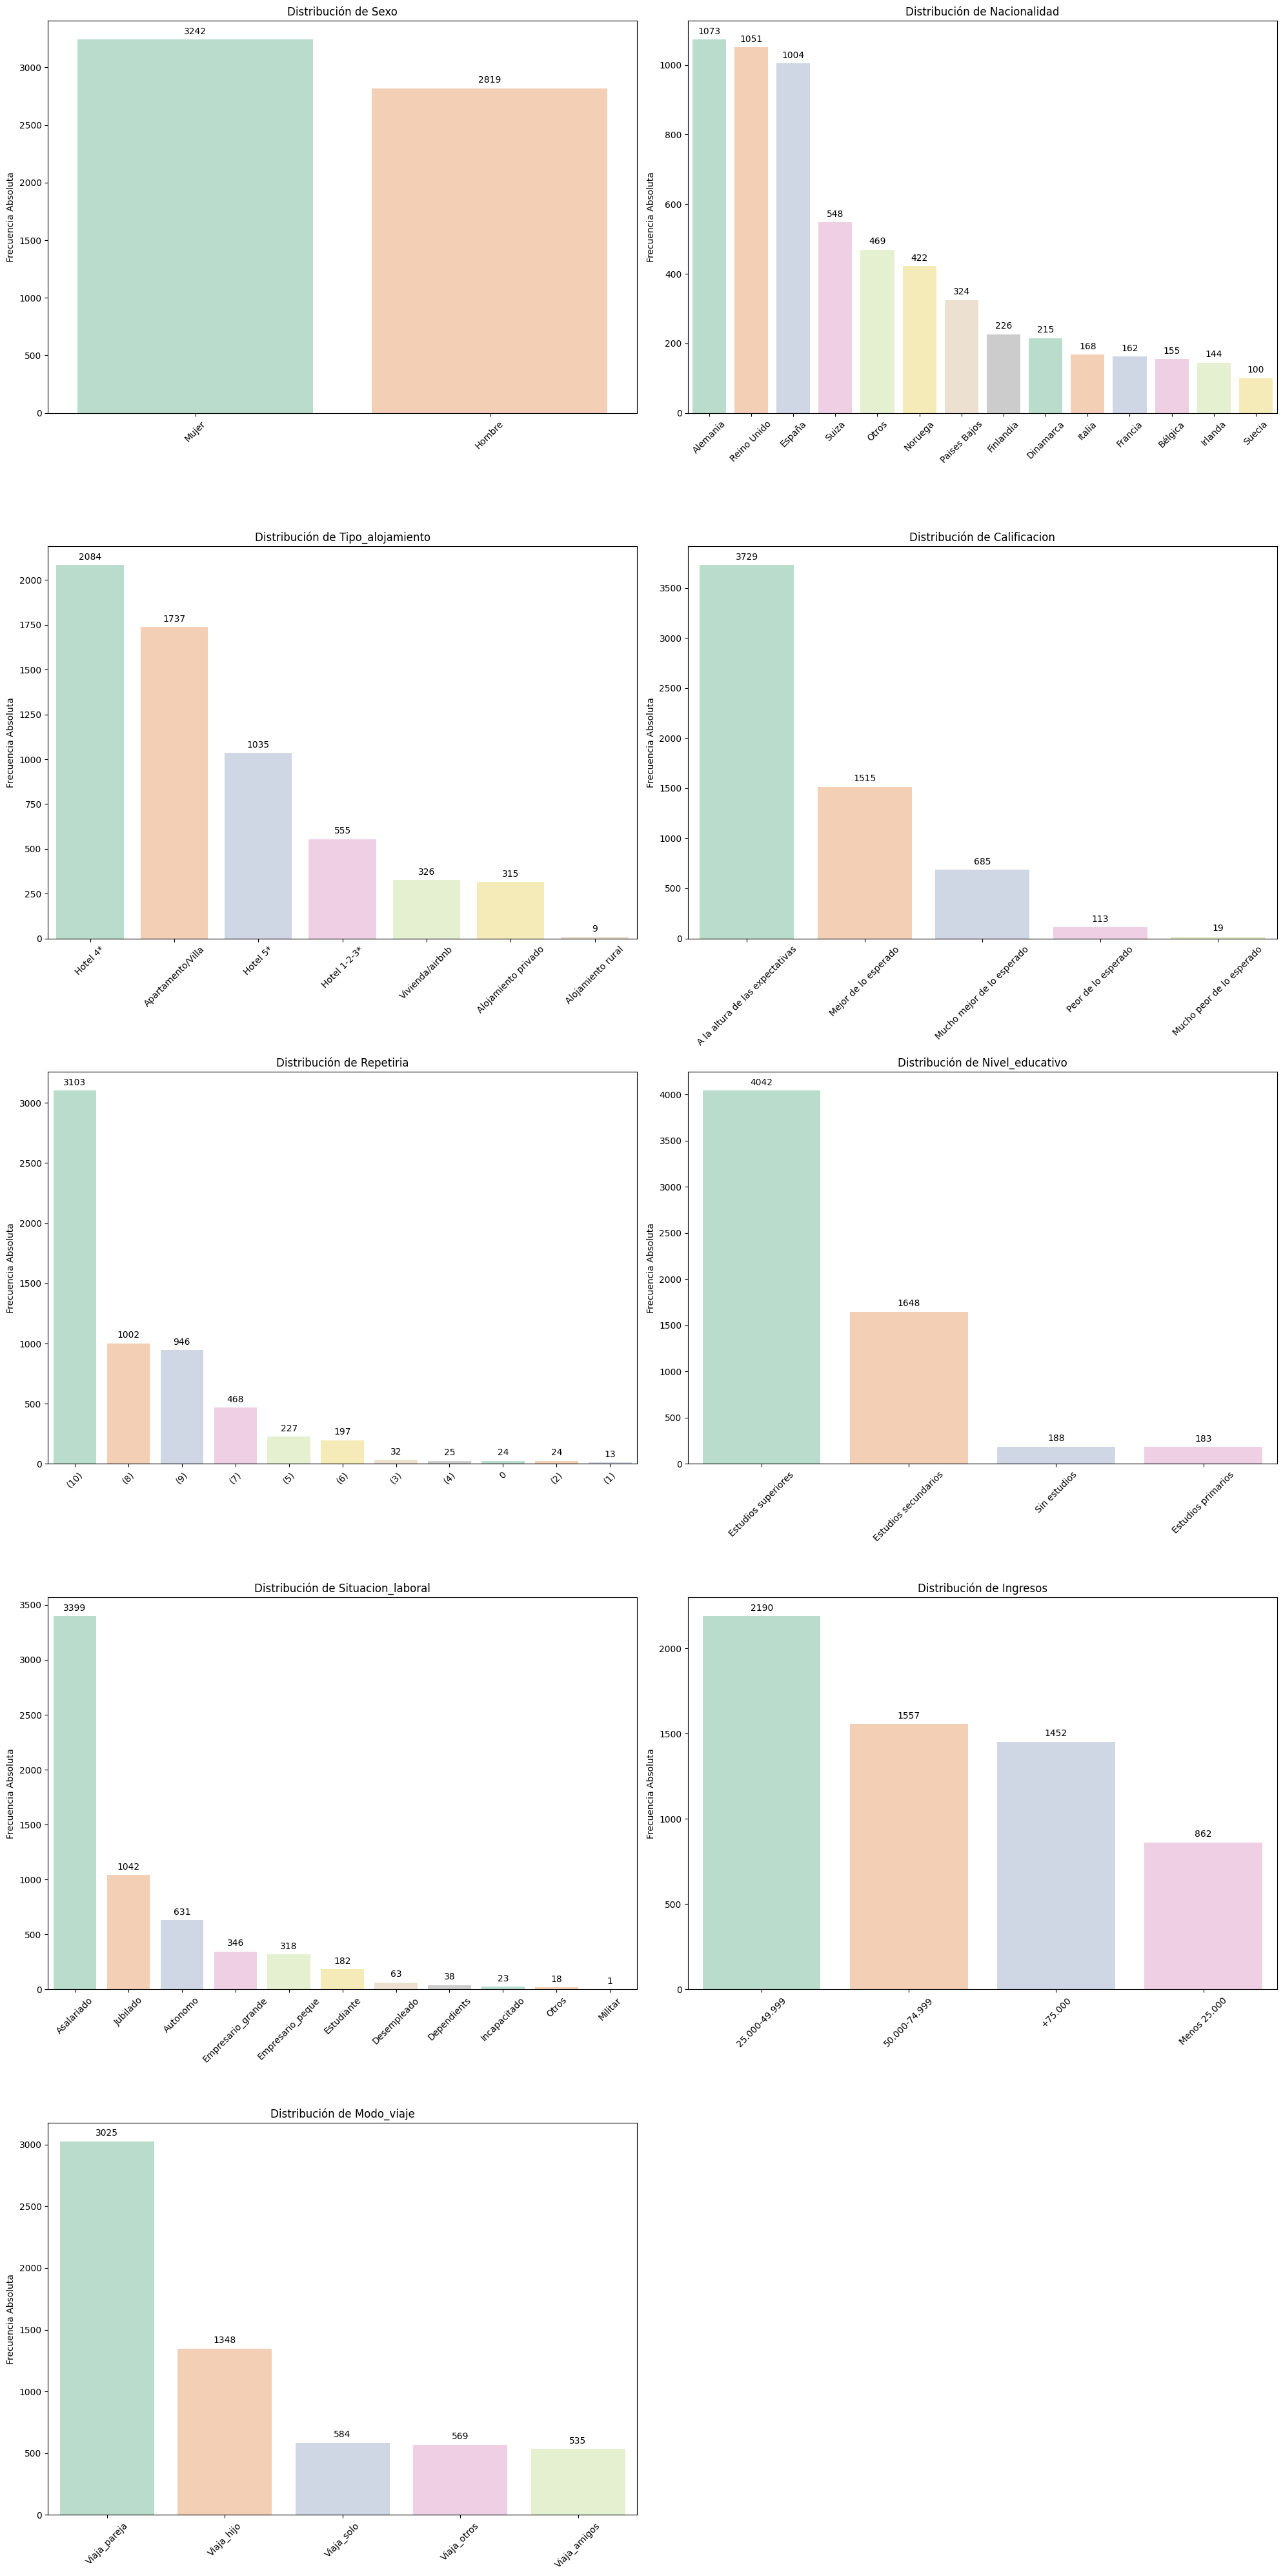

In [7]:
funciones.pinta_distribucion_categoricas(df_2019,variables_categoricas,relativa=False,mostrar_valores=True)

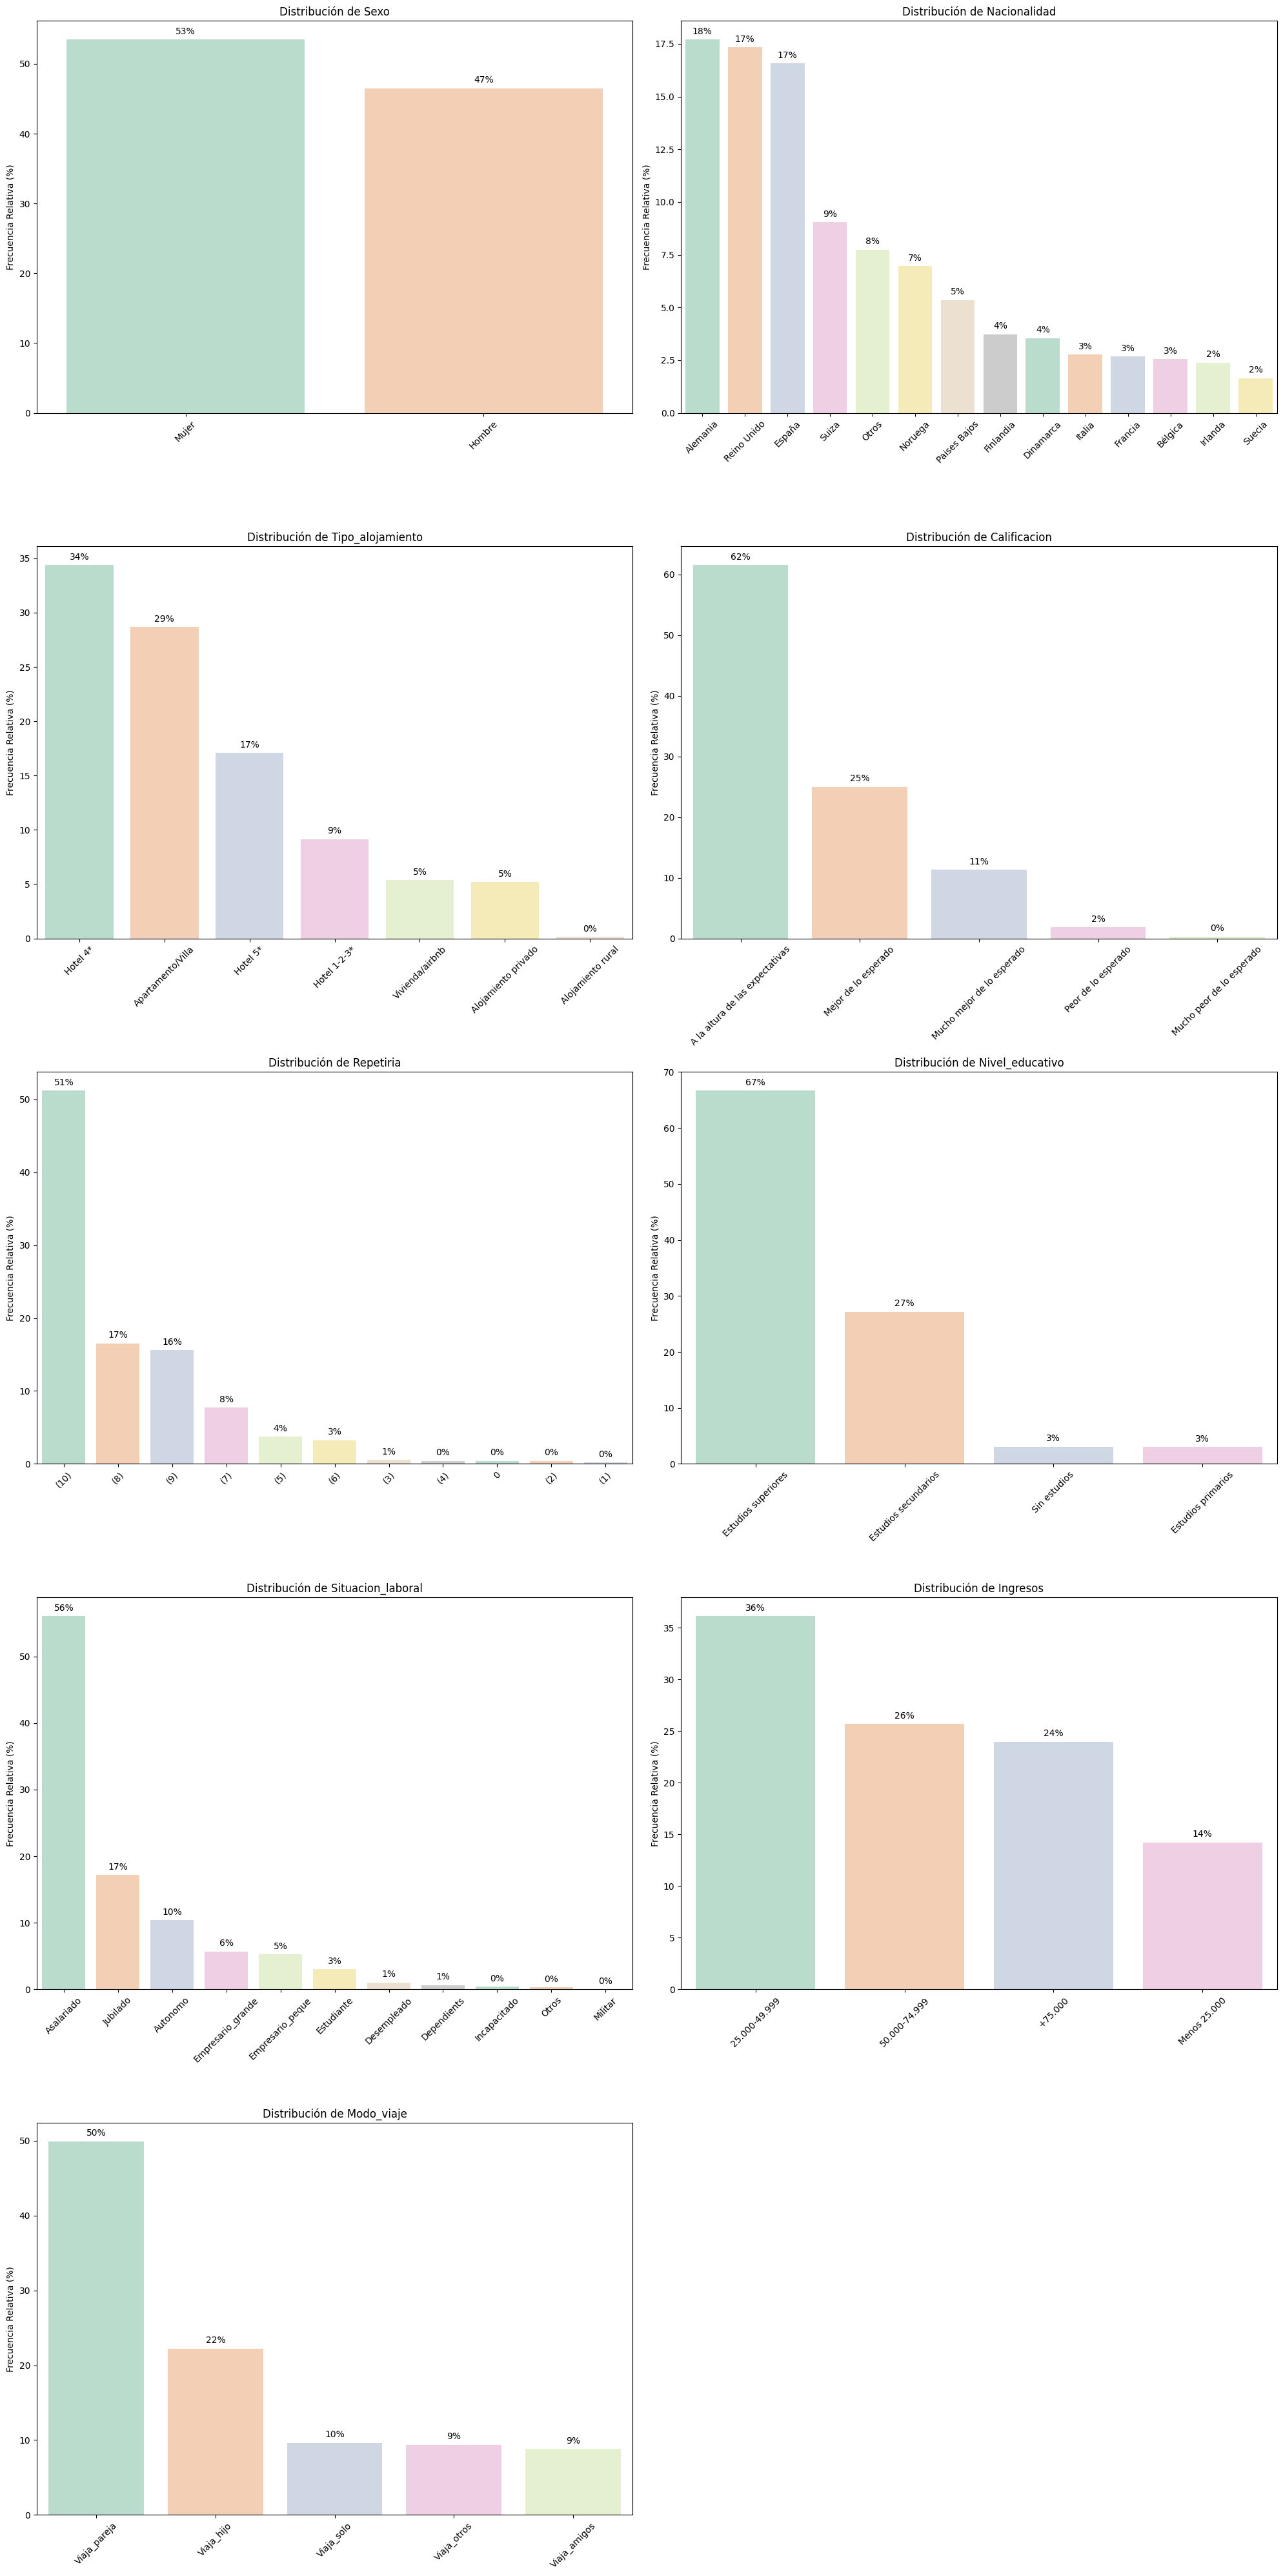

In [8]:
funciones.pinta_distribucion_categoricas(df_2019,variables_categoricas,relativa=True,mostrar_valores=True)

**2022**


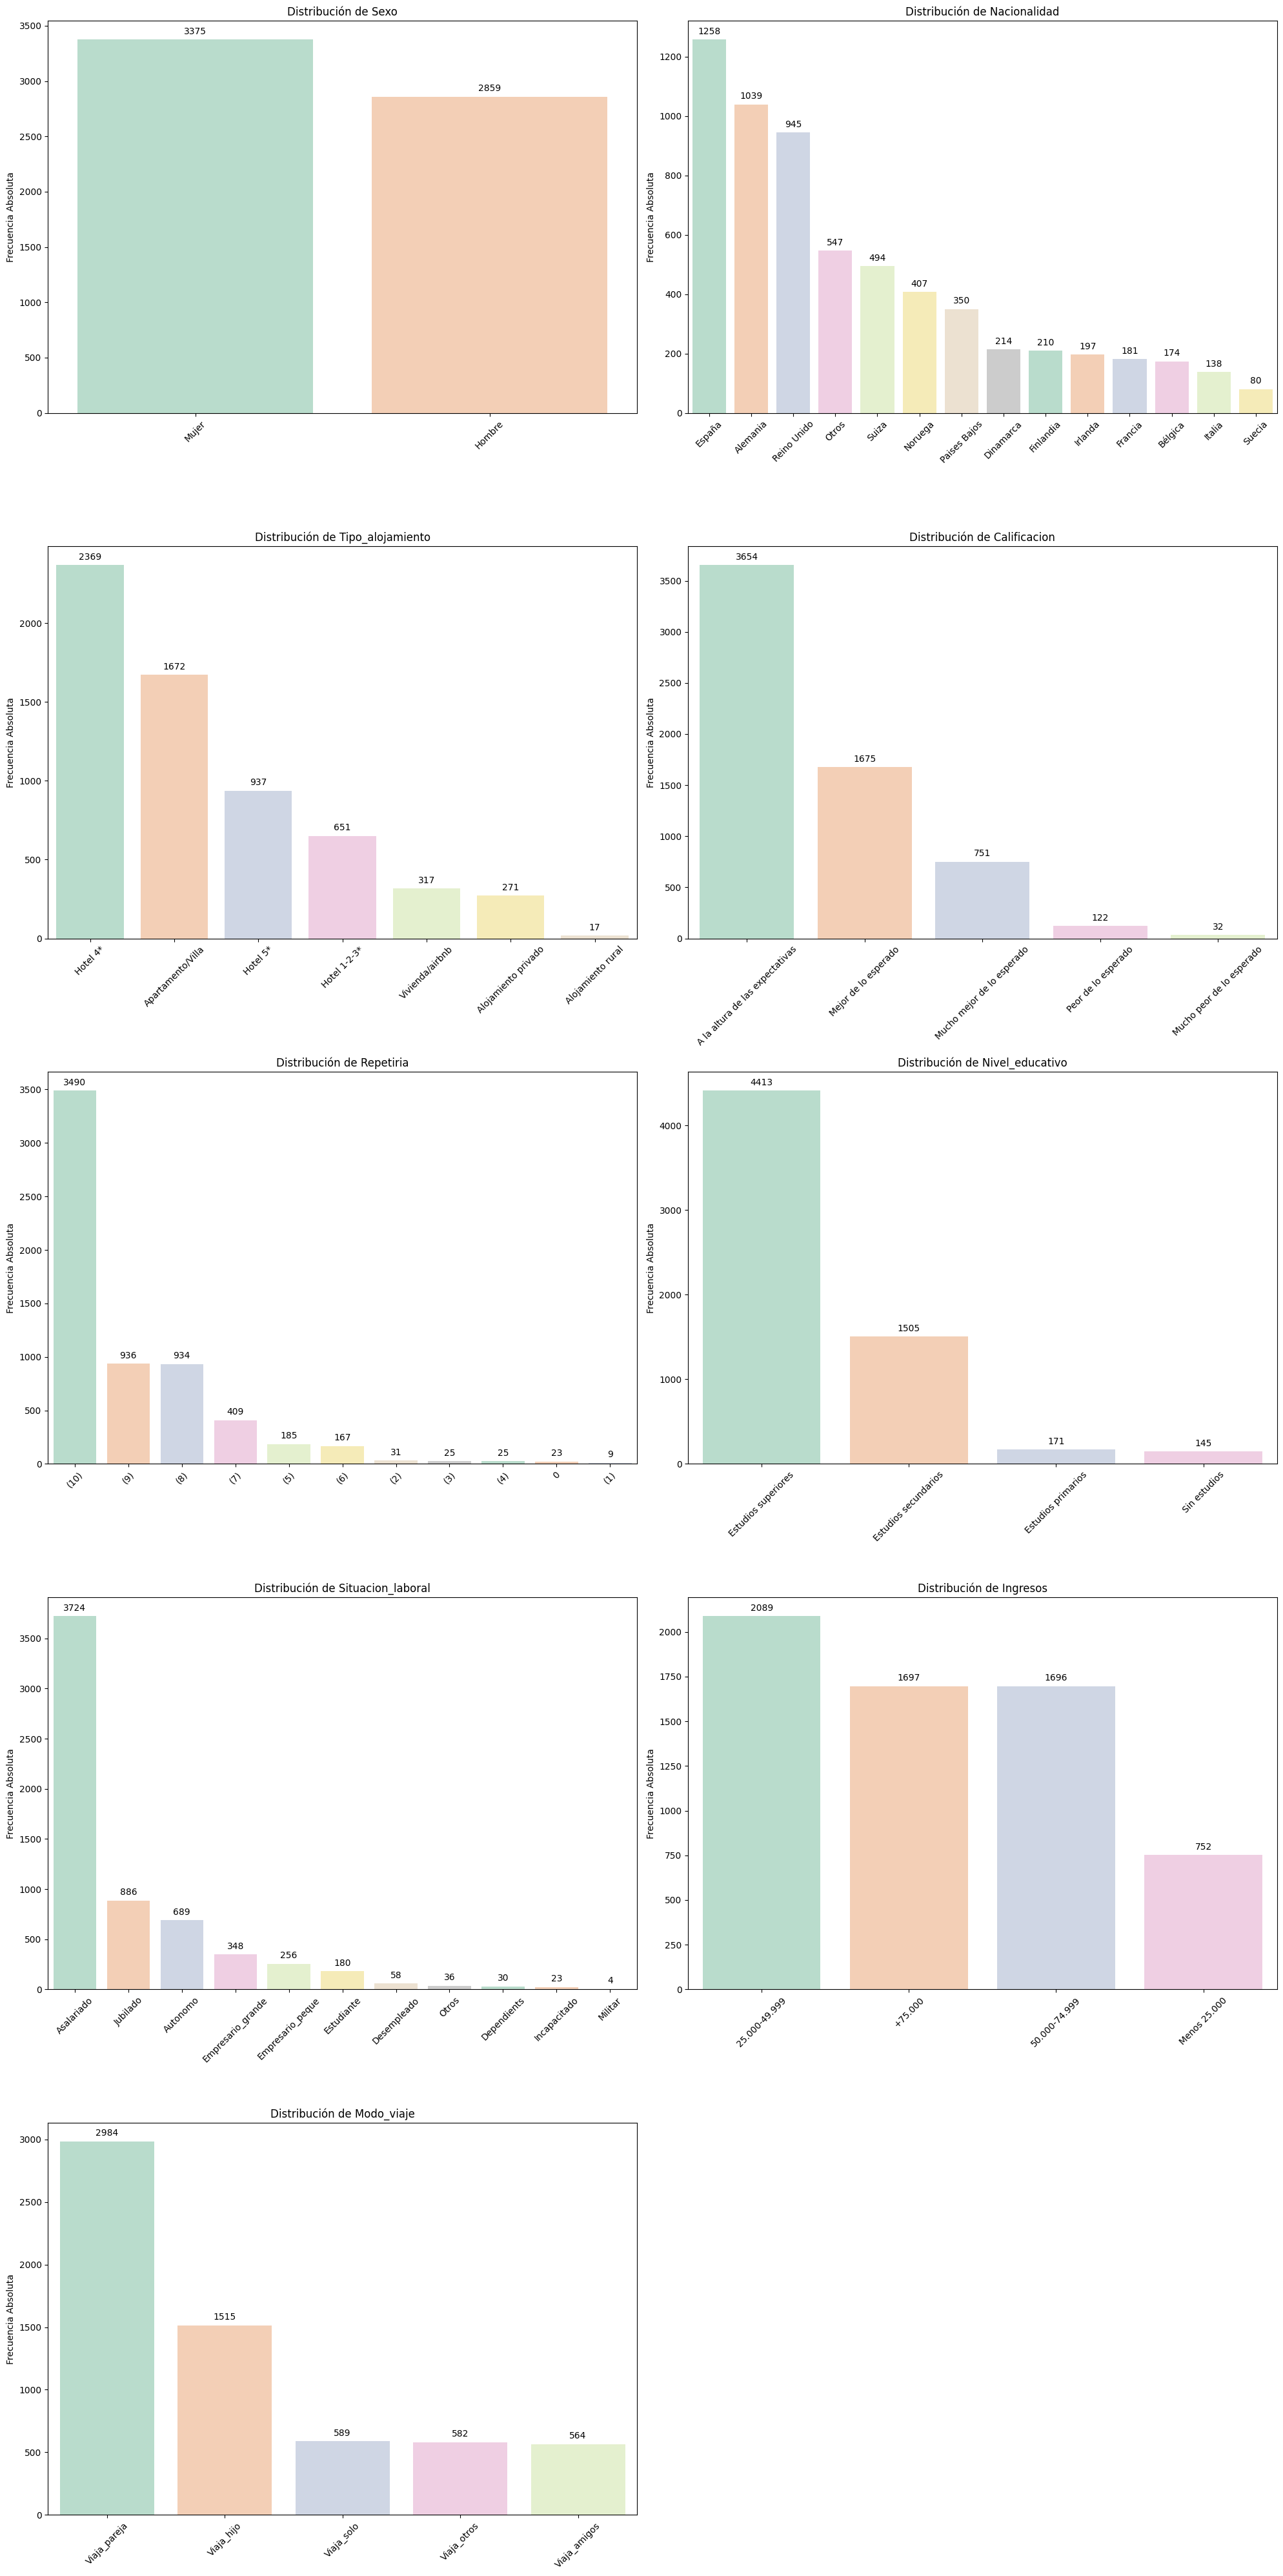

In [9]:
funciones.pinta_distribucion_categoricas(df_2022,variables_categoricas,relativa=False,mostrar_valores=True)

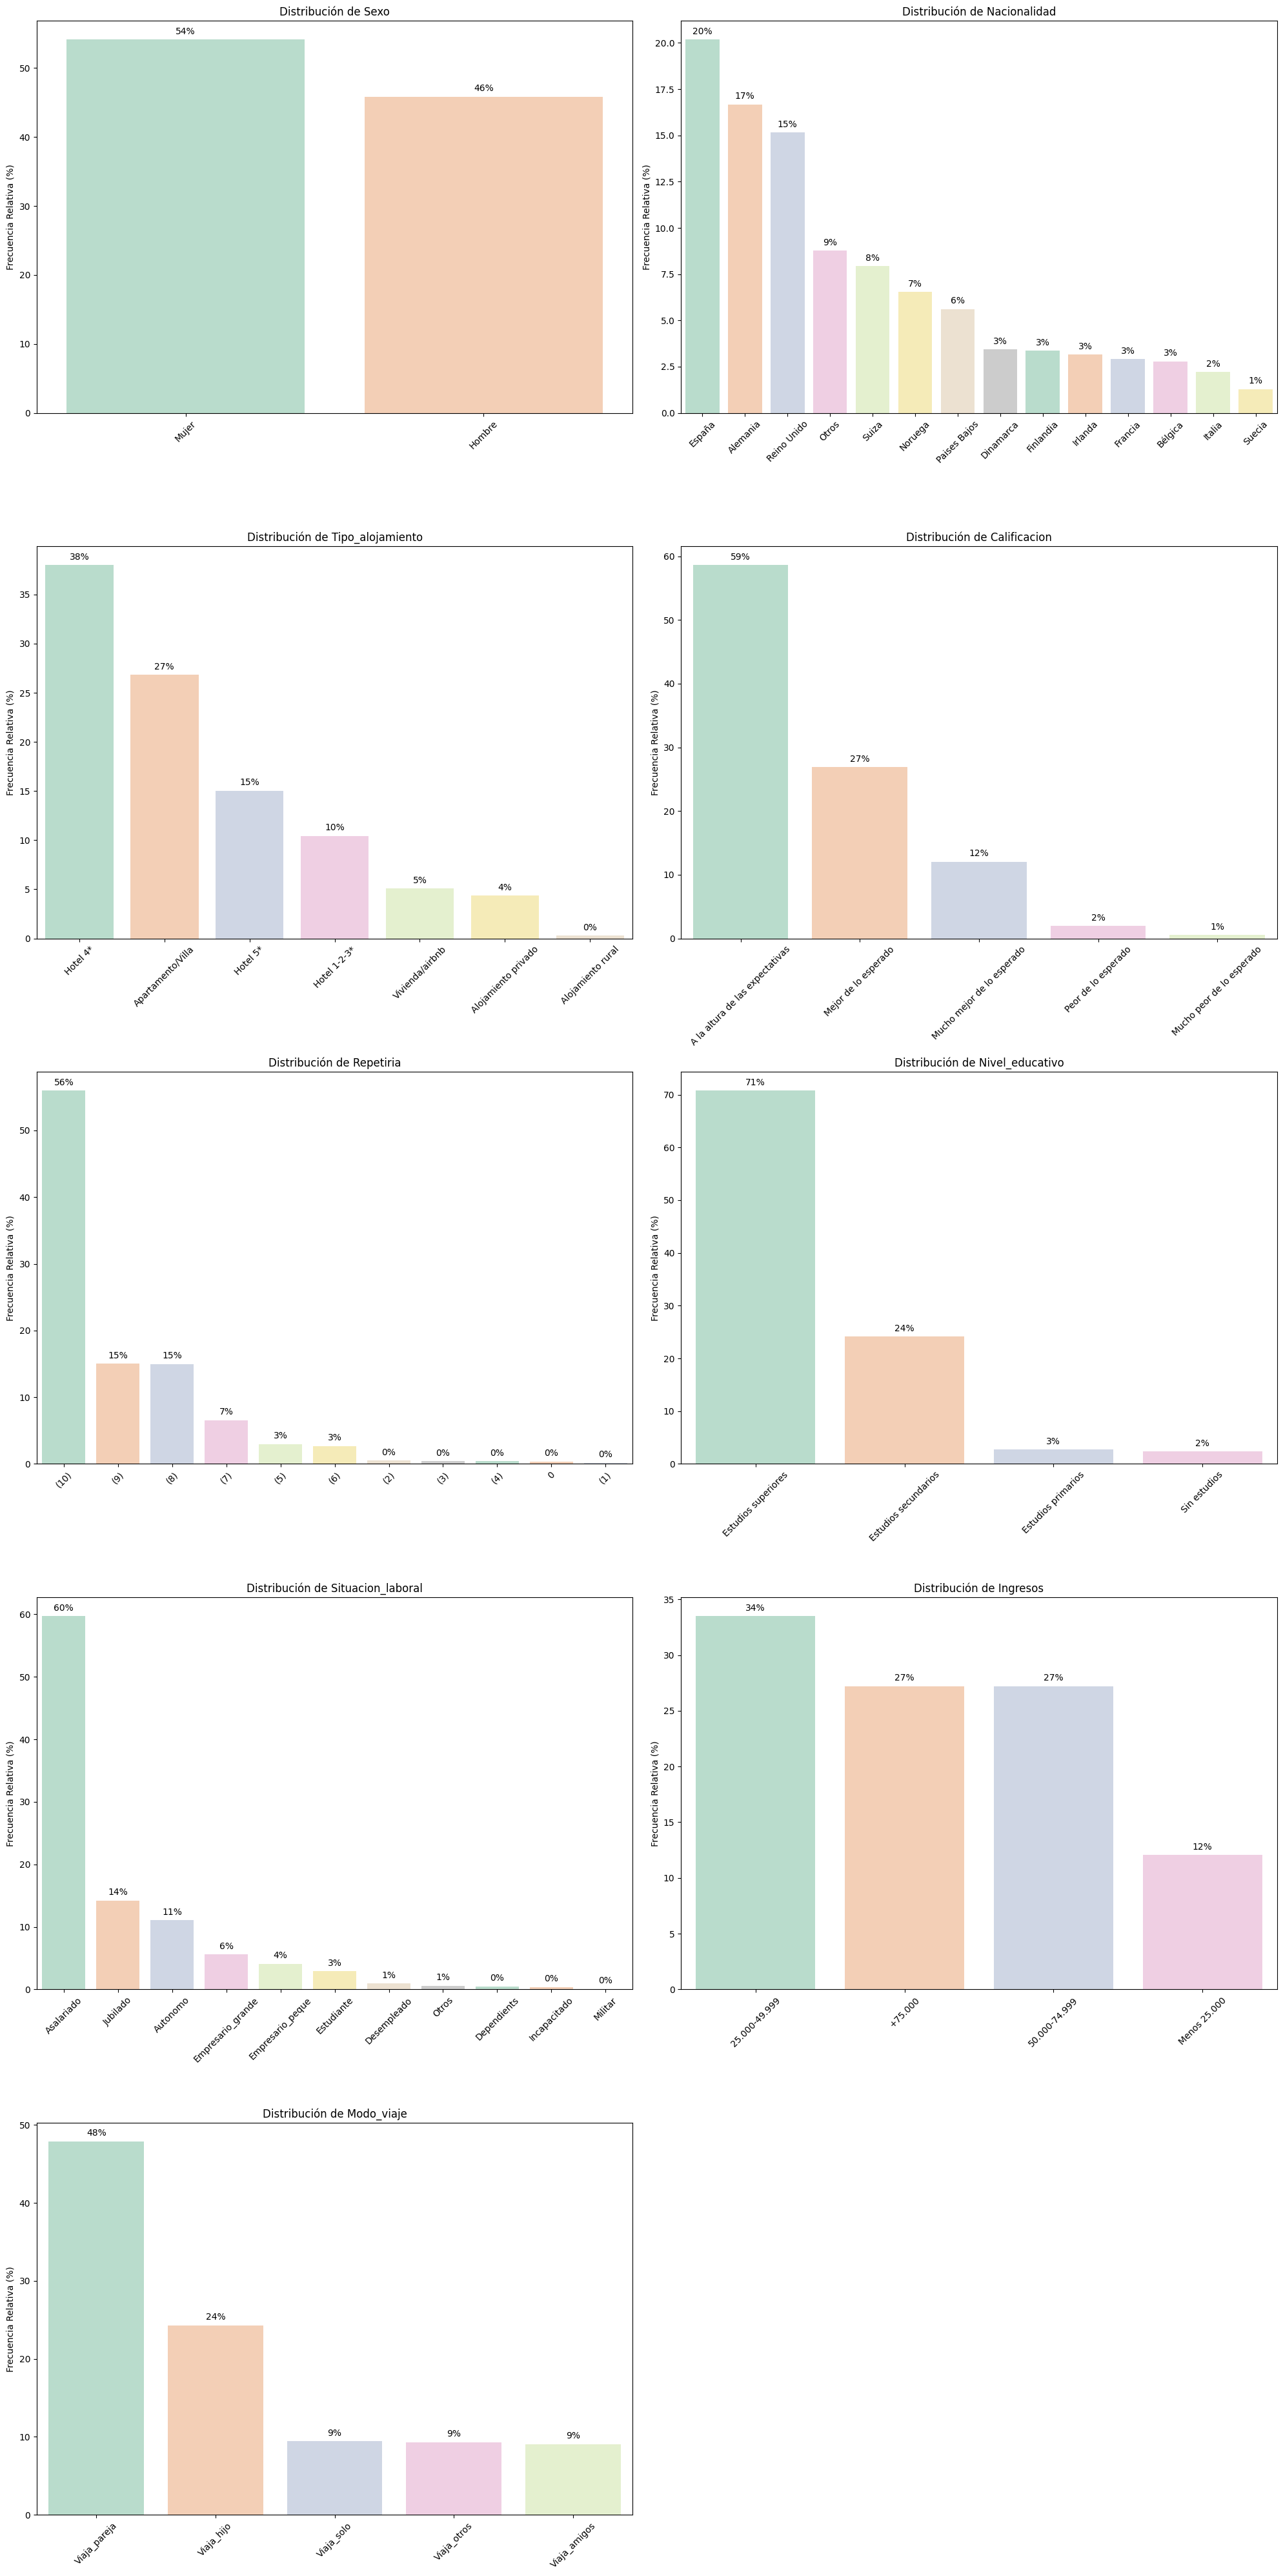

In [10]:
funciones.pinta_distribucion_categoricas(df_2022,variables_categoricas,relativa=True,mostrar_valores=True)

**Resumen analisis univariante de las variables categóricas**

En resumen:
|Variables|Categoría|2019|2022|
|-|-|-|-|
|Sexo| Mujer| 53% |54% |
|Nacionalidad| Alemania - España |18% - 17%|20% -17% |
|Tipo de alojamiento| Hotel 4*| 34%| 38%|
|Calificación| 10| 62%| 59%|
|Repetiría| 10| 51%| 56%|
|Nivel educativo| Estudios superiores| 67%| 71%|
|Situación laboral| Asalariados| 56%| 60%|
|Ingresos| 25.000-49.999| 36%| 34%|
|Modo_viaje| Pareja| 50%| 48%|

# **2.2 Variables numéricas**

In [11]:
#Variables numéricas
variables_numericas=["Edad","Noches","Coste_vuelos","Coste_alojamiento","Gastos","Horas_fuera_alojamiento","Visitas_totales_Islas","Visitas_total_GC","Personas_hogar"]

In [12]:
#Principales estadísticos en 2019
df_2019.describe()

,Edad,Noches,Coste_vuelos,Coste_alojamiento,Gastos,Horas_fuera_alojamiento,Visitas_totales_Islas,Visitas_total_GC,Personas_hogar,Año
count,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.0
mean,47.726283,7.975747,366.042686,287.616715,360.302976,7.215476,5.016994,2.812572,2.359677,2019.0
std,14.614298,2.651963,298.708511,334.737851,279.043028,3.942085,3.562623,2.510804,0.915930,0.0
min,16.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2019.0
25%,37.000000,7.000000,10.000000,1.592000,115.000000,4.000000,2.000000,1.000000,2.000000,2019.0
50%,48.000000,7.000000,349.000000,60.000000,338.000000,7.000000,4.000000,2.000000,2.000000,2019.0
75%,58.000000,9.000000,600.000000,585.000000,567.000000,10.000000,7.000000,4.000000,3.000000,2019.0
max,87.000000,14.000000,999.000000,999.000000,999.000000,19.000000,17.000000,11.000000,4.000000,2019.0


Edad y duración de la estancia: La edad media del turista es de 48 años, y su estancia promedio en la isla es de 8 noches.

Costes y visitas: El coste medio de los vuelos es de 366€, mientras que el gasto en alojamiento asciende a 287€ y su gasto medio en la durante su estancia es de 360€. En promedio, los turistas han visitado las Islas Canarias unas 7 veces y, en particular, Gran Canaria en 3 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 persona, y pasan un promedio de 8 horas al día fuera del alojamiento.

In [13]:
#Principales estadísticos en 2022
df_2022.describe()

,Edad,Noches,Coste_vuelos,Coste_alojamiento,Gastos,Horas_fuera_alojamiento,Visitas_totales_Islas,Visitas_total_GC,Personas_hogar,Año
count,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.0
mean,48.074110,7.880173,351.790480,234.925786,341.690813,6.757940,5.069137,2.706449,2.325634,2022.0
std,14.262611,2.648372,310.306174,322.957657,294.716489,3.779451,3.589859,2.424036,0.923251,0.0
min,16.000000,3.000000,-45.000000,-62.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2022.0
25%,38.000000,7.000000,2.123750,1.571000,2.403000,4.000000,2.000000,1.000000,2.000000,2022.0
50%,49.000000,7.000000,320.000000,2.949000,313.000000,6.000000,4.000000,2.000000,2.000000,2022.0
75%,58.000000,9.000000,600.000000,493.000000,580.000000,10.000000,7.000000,3.000000,3.000000,2022.0
max,85.000000,14.000000,999.000000,999.000000,999.000000,15.000000,17.000000,11.000000,4.000000,2022.0


Edad y duración de la estancia: La edad media del turista es de 48 años, y su estancia promedio en la isla es de 9 noches.

Costes y visitas: El coste medio de los vuelos es de 352€, mientras que el gasto en alojamiento asciende a 235€ y su gasto durante las vacaciones es de 342€ de media. En promedio, los turistas han visitado las Islas Canarias unas 5 veces y, en particular, Gran Canaria en 3 ocasiones.

Composición del hogar y tiempo fuera del alojamiento: El hogar promedio de estos turistas está compuesto por 3 persona, y pasan un promedio de 6 horas al día fuera del alojamiento.

A diferencia del 2019, si hay una disminucion en las horas medias que los turistas pasan fuera del alojaminendo siendo 6h de media en el 2022, puede tener relación con las restricciones sanitarias y la inseguridad de la exposición en zonas de aglomeraciones.

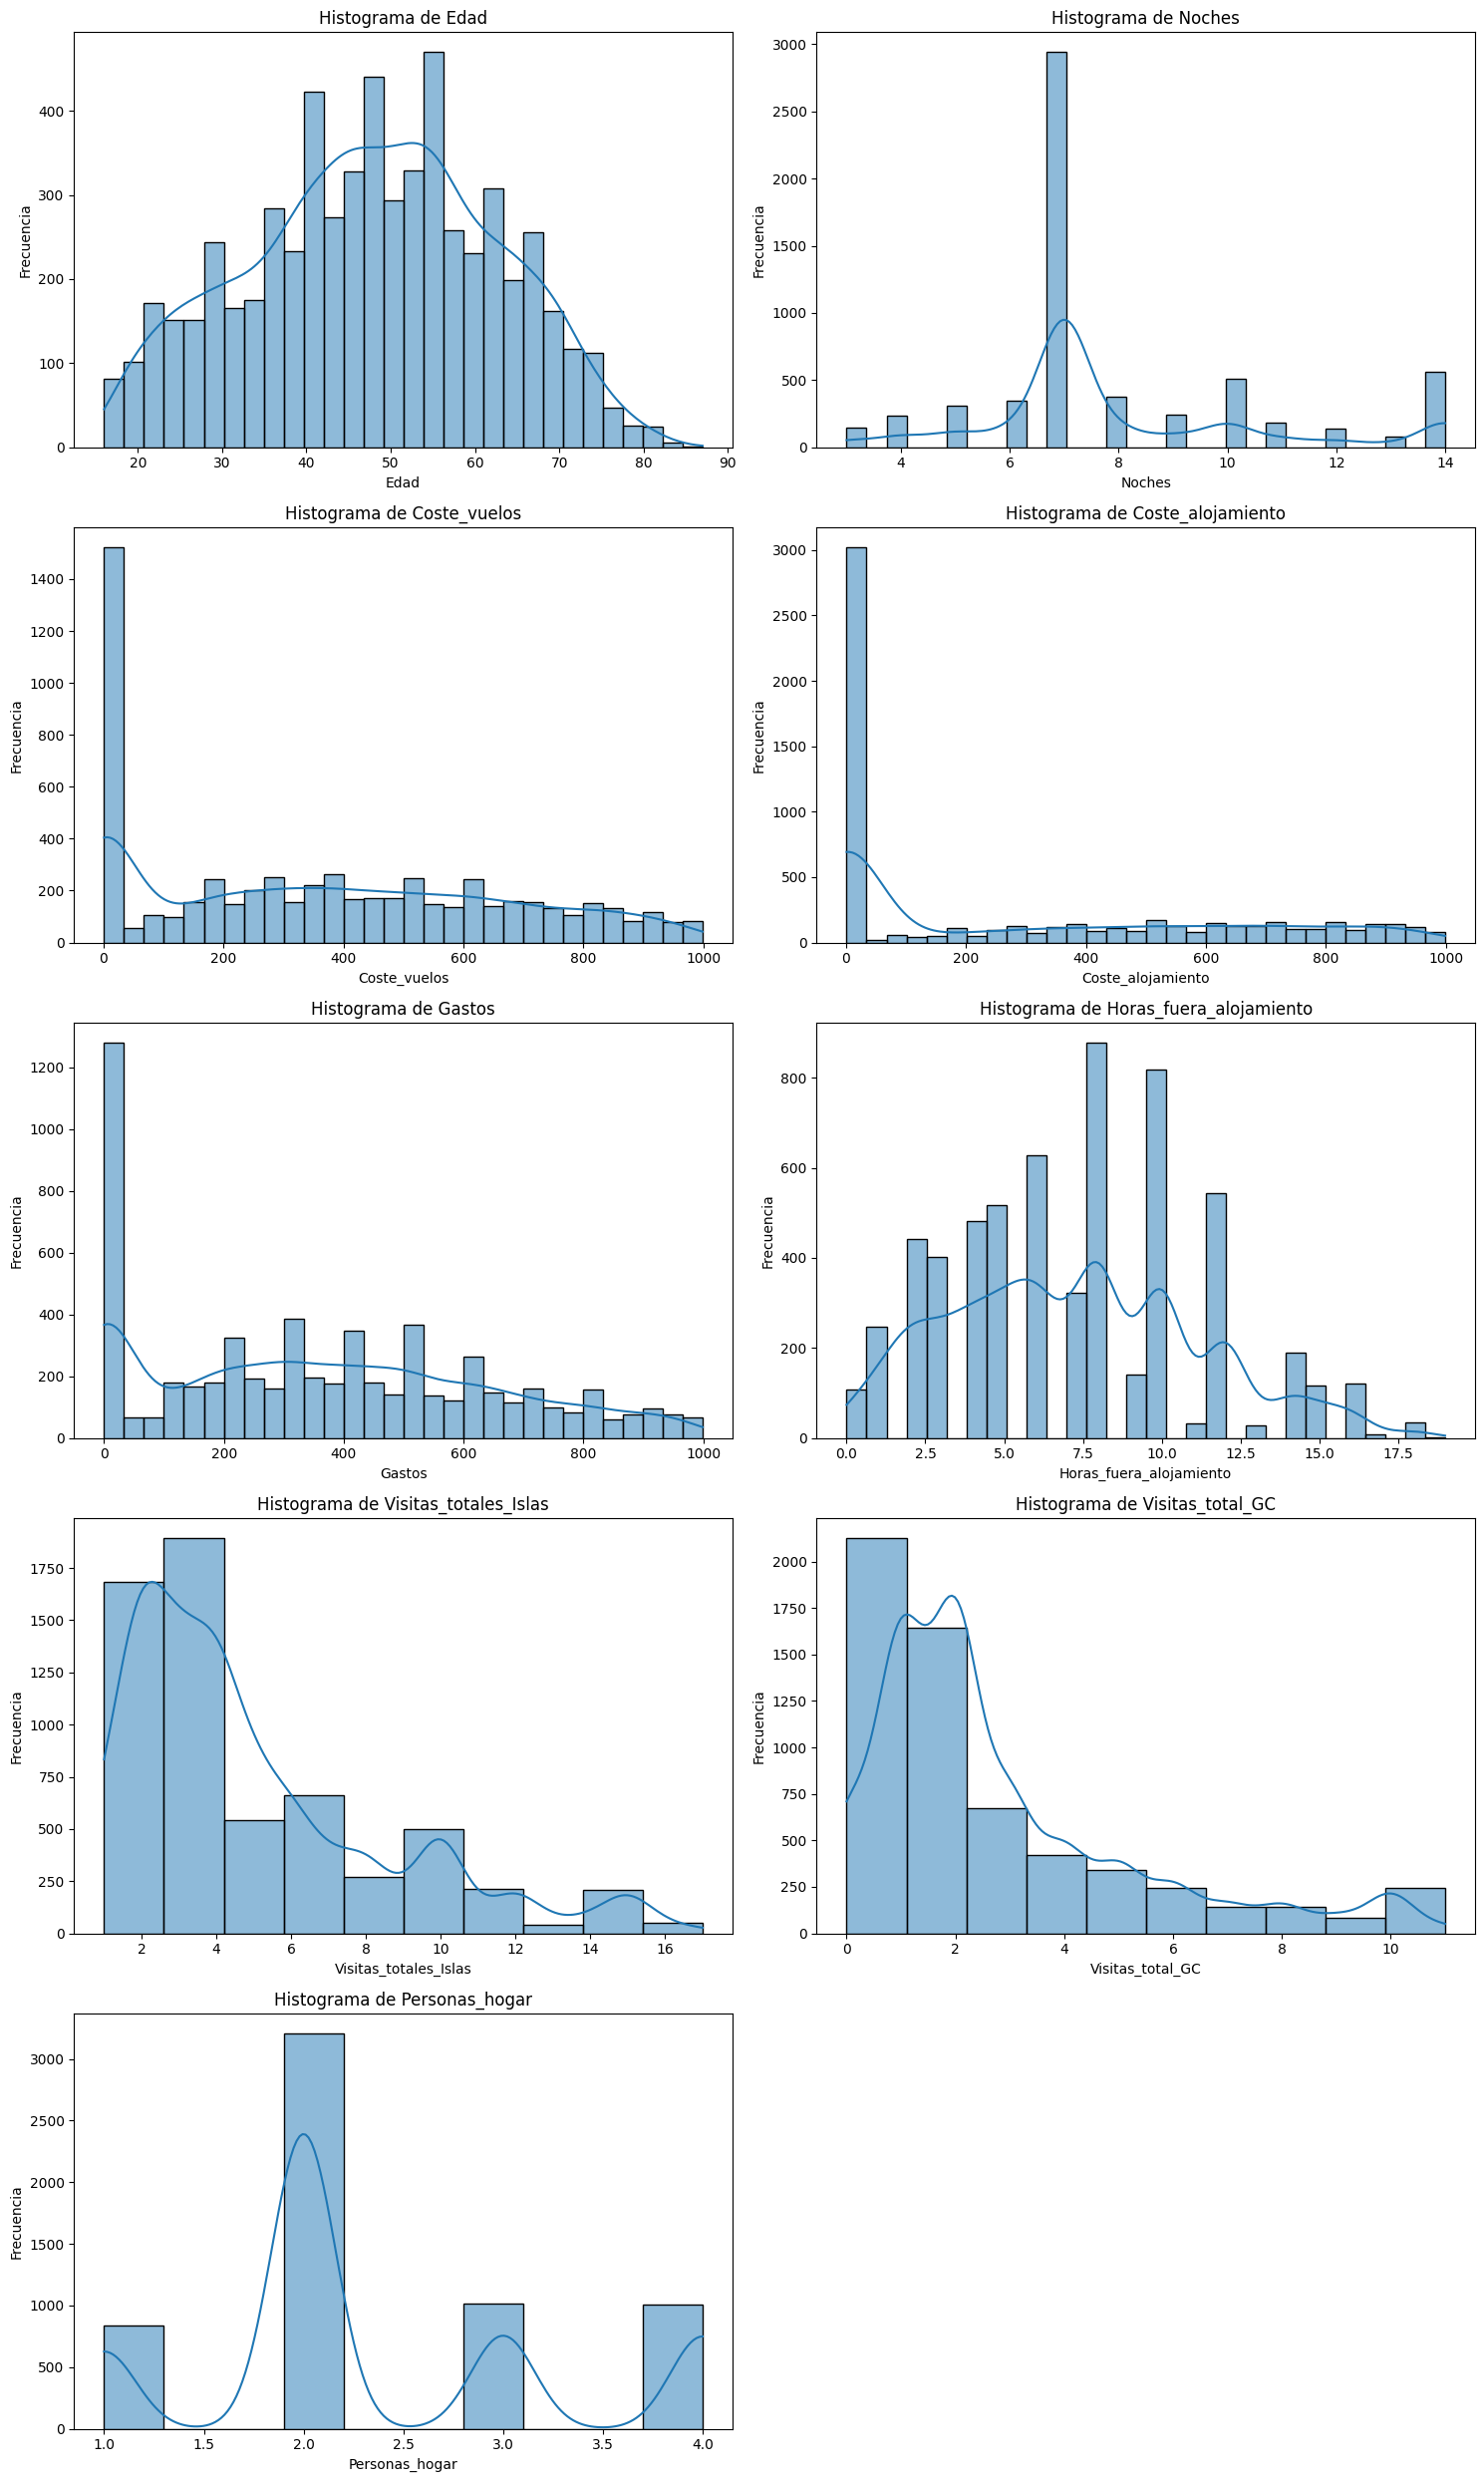

In [14]:
funciones.plot_numerical_histograms(df_2019, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

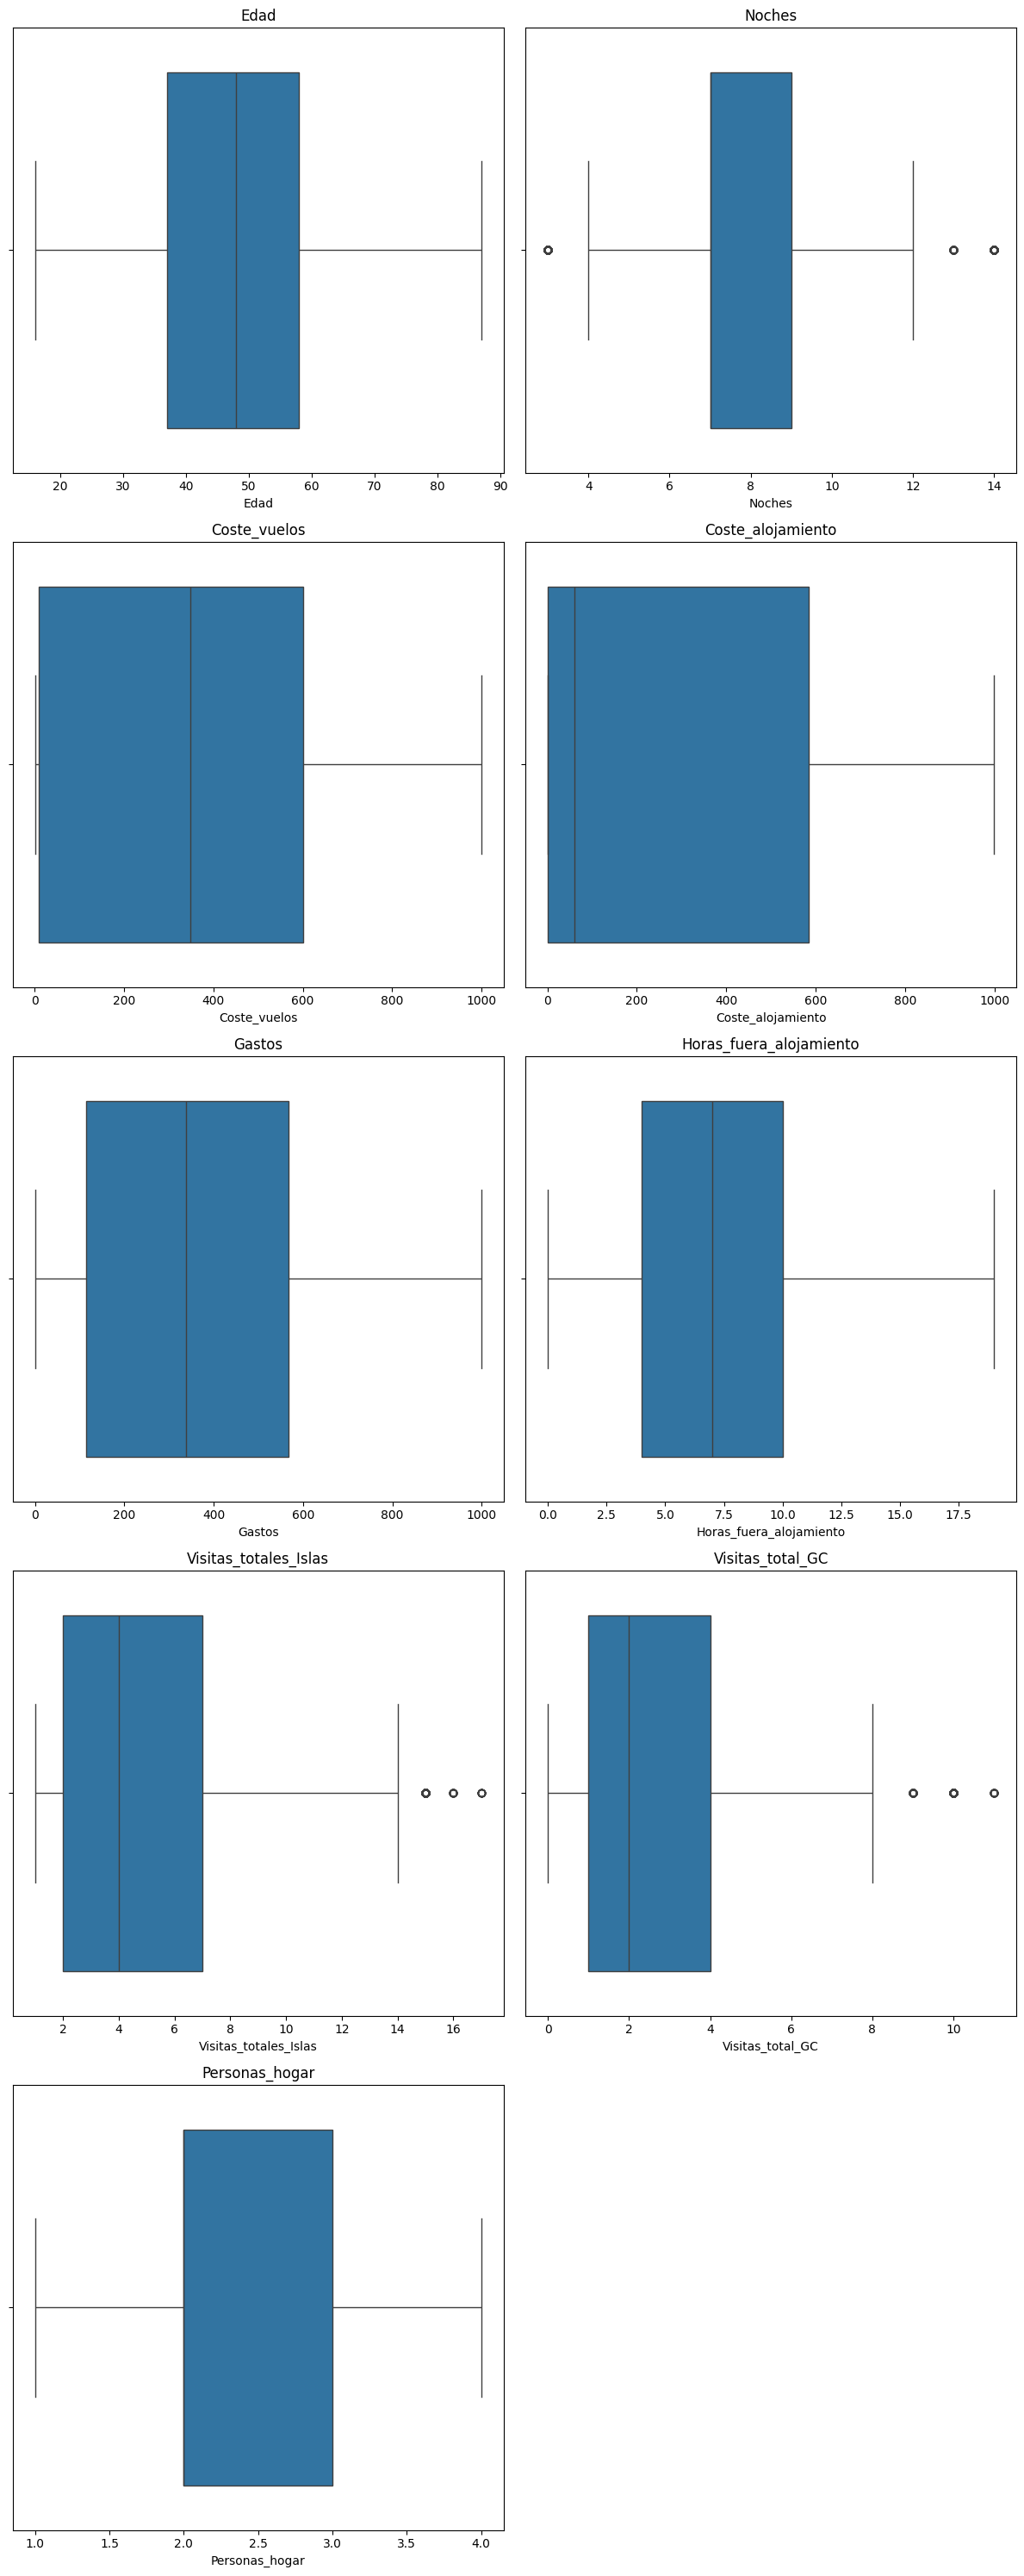

In [15]:
funciones.plot_multiple_boxplots(df_2019, variables_numericas)

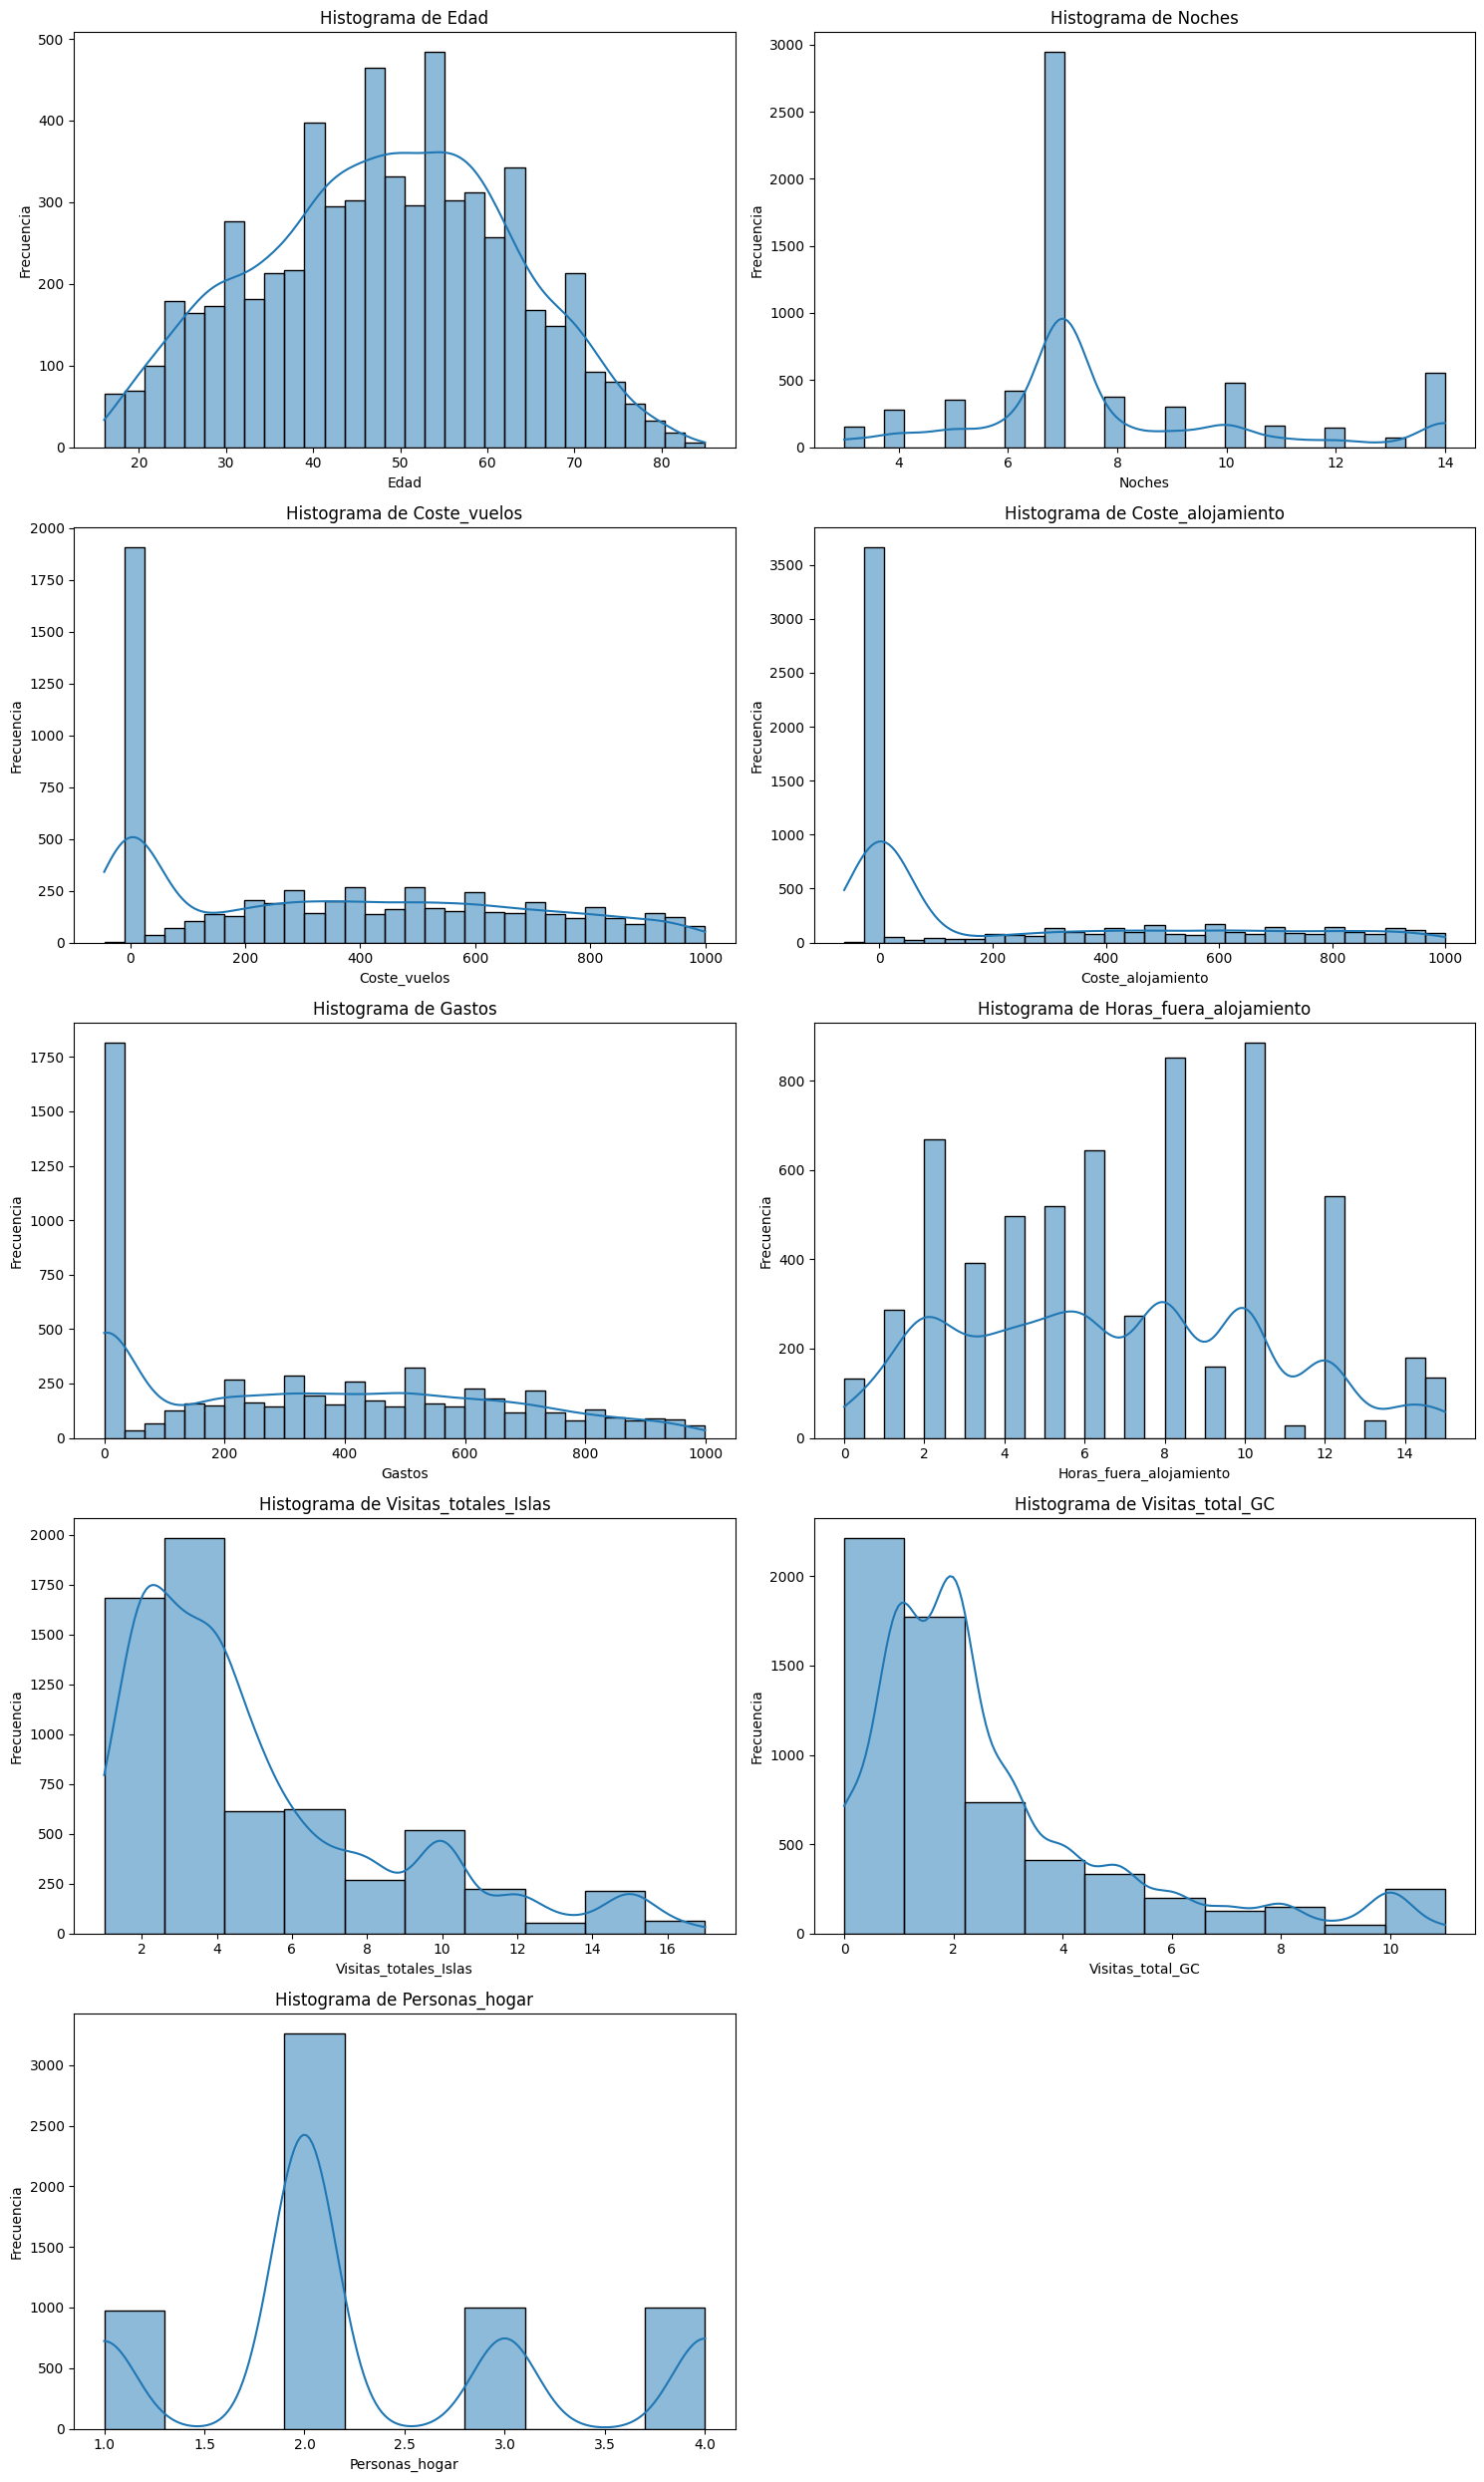

In [16]:
funciones.plot_numerical_histograms(df_2022, variables_numericas, bins_list=[30,30,30,30,30,30], kde=True)

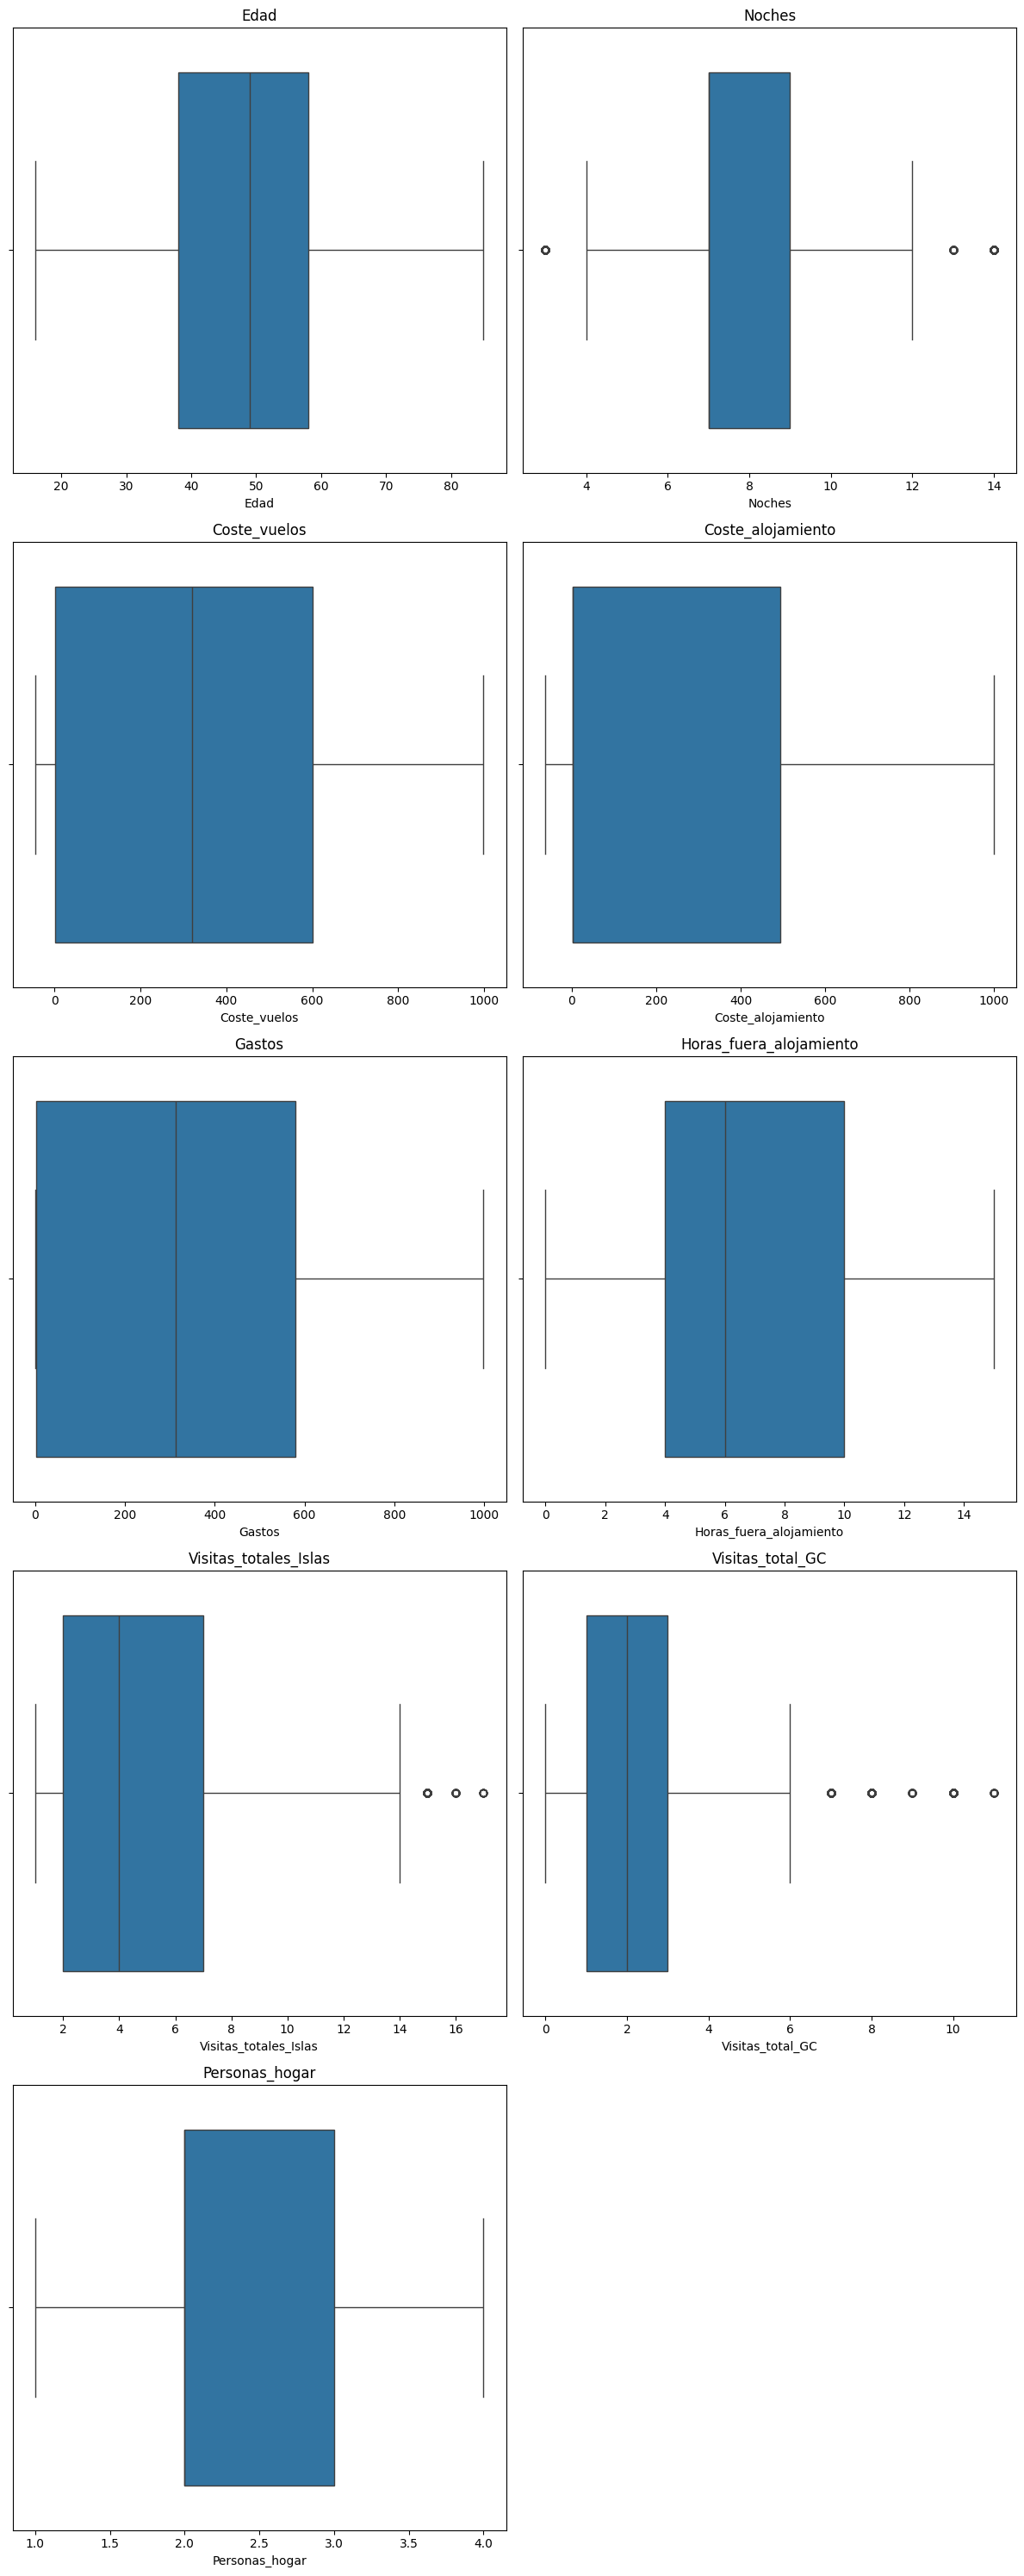

In [17]:
funciones.plot_multiple_boxplots(df_2022, variables_numericas)

Veamos 2022 en profundidad

In [18]:
def variabilidad(df_perfil_turistico):
    # Seleccionar solo las columnas numéricas
    df_numericas = df_perfil_turistico.select_dtypes(include=["number"])
    
    # Calcular el resumen estadístico y seleccionar las filas de std y mean
    df_var = df_numericas.describe().loc[["std", "mean"]].T
    
    # Calcular el Coeficiente de Variación (CV)
    df_var["CV"] = df_var["std"] / df_var["mean"]
    
    return df_var

In [19]:
variabilidad(df_perfil_turistico)

,std,mean,CV
Edad,14.437511,47.902643,0.301393
Noches,2.650466,7.927288,0.334347
Coste_vuelos,304.715071,358.816313,0.849223
Coste_alojamiento,329.857892,260.900550,1.264305
Gastos,287.236100,350.865951,0.818649
Horas_fuera_alojamiento,3.867095,6.983489,0.553748
Visitas_totales_Islas,3.576408,5.043432,0.709122
Visitas_total_GC,2.467661,2.758764,0.894481
Personas_hogar,0.919770,2.342416,0.392659
Año,1.499913,2020.521106,0.000742


- Alta dispersión: Las variables como "Coste de los vuelos", "Coste de alojamiento", "Gastos" y "Visitas totales GC" tienen un coeficiente de variación alto, lo que indica que hay una gran dispersión en torno a la media, es decir, valores extremos o muy diferentes.
- Baja dispersión: Variables como "Edad", "Horas fuera de alojamiento", y "Personas en el hogar" tienen un coeficiente de variación más bajo, lo que indica que los datos son más homogéneos.
- Año: La variable "Año" tiene una dispersión casi nula, sugiriendo que todos los datos provienen del mismo período (probablemente 2020).


In [20]:
#Rangos
df_perfil_turistico.describe().loc["max"] - df_perfil_turistico.describe().loc["min"]

Edad                         71.0
Noches                       11.0
Coste_vuelos               1044.0
Coste_alojamiento          1061.0
Gastos                      999.0
Horas_fuera_alojamiento      19.0
Visitas_totales_Islas        16.0
Visitas_total_GC             11.0
Personas_hogar                3.0
Año                           3.0
dtype: float64

Sería interesante segmentar más los datos por tipo de alojamiento para ver patrones más detallados en los viajeros que eligen alojamientos más caros versus más baratos.

In [21]:
# Filtrar los datos según tipo de alojamiento
alojamiento_privado = df_2022[df_2022['Tipo_alojamiento'] == 'Alojamiento privado']['Coste_alojamiento']
alojamiento_rural = df_2022[df_2022['Tipo_alojamiento'] == 'Alojamiento rural']['Coste_alojamiento']
apartamento_villa = df_2022[df_2022['Tipo_alojamiento'] == 'Apartamento/Villa']['Coste_alojamiento']
hotel_1_2_3 = df_2022[df_2022['Tipo_alojamiento'] == 'Hotel 1-2-3*']['Coste_alojamiento']
hotel_4 = df_2022[df_2022['Tipo_alojamiento'] == 'Hotel 4*']['Coste_alojamiento']
hotel_5 = df_2022[df_2022['Tipo_alojamiento'] == 'Hotel 5*']['Coste_alojamiento']
vivienda_airbnb = df_2022[df_2022['Tipo_alojamiento'] == 'Vivienda/airbnb']['Coste_alojamiento']

# Realizar el análisis de varianza (ANOVA)
f_statistic, p_value = f_oneway(
    alojamiento_privado, alojamiento_rural, apartamento_villa, 
    hotel_1_2_3, hotel_4, hotel_5, vivienda_airbnb
)

# Mostrar los resultados
print(f"Estadística F: {f_statistic}, P-value: {p_value}")

Estadística F: 48.05026434081914, P-value: 6.107225707473254e-58


Dado que el valor p es mucho menor que 0.05, podemos concluir que sí existen diferencias significativas en los costes de alojamiento entre al menos dos de los tipos de alojamiento que has analizado. Esto sugiere que los diferentes tipos de alojamiento tienen costes de alojamiento muy diferentes.

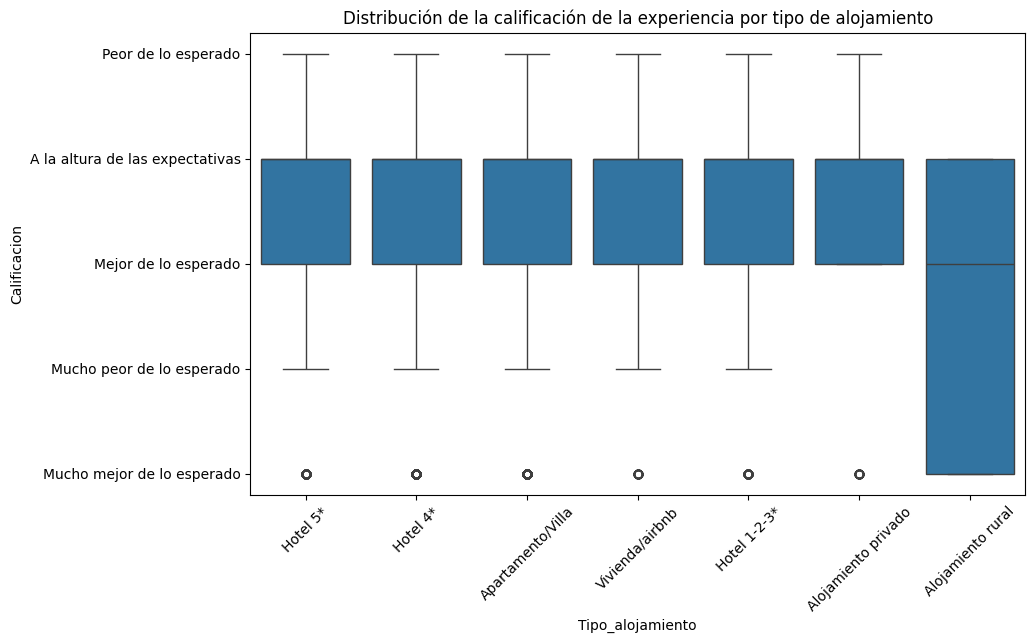

In [22]:
funciones.plot_calificacion_por_alojamiento(df_2022)

Aquí se observa claramente que la valoración a los alojamientos rurales es negativa con respecto al resto de alojamientos que se mantienen en valoraciones más positivas

In [23]:
# Filtrar las categorías de hoteles
hoteles_2019 = df_2019[df_2019['Tipo_alojamiento'].isin(['Hotel 1-2-3*', 'Hotel 4*', 'Hotel 5*'])]
hoteles_2022 = df_2022[df_2022['Tipo_alojamiento'].isin(['Hotel 1-2-3*', 'Hotel 4*', 'Hotel 5*'])]

# Calcular métricas clave
perfil_hotelero_2019 = {
    'Año': 2019,
    'Total_Turistas': len(hoteles_2019),
    'Duracion_Promedio': hoteles_2019['Noches'].mean(),
    'Gasto_Total_Promedio': (hoteles_2019['Coste_vuelos'] + hoteles_2019['Coste_alojamiento'] + hoteles_2019['Gastos']).mean(),
    'Edad_Promedio': hoteles_2019['Edad'].mean(),
    'Nacionalidad_Principal': hoteles_2019['Nacionalidad'].mode()[0],
    'Horas_fuera_promedio': hoteles_2019['Horas_fuera_alojamiento'].mean()
}

perfil_hotelero_2022 = {
    'Año': 2022,
    'Total_Turistas': len(hoteles_2022),
    'Duracion_Promedio': hoteles_2022['Noches'].mean(),
    'Gasto_Total_Promedio': (hoteles_2022['Coste_vuelos'] + hoteles_2022['Coste_alojamiento'] + hoteles_2022['Gastos']).mean(),
    'Edad_Promedio': hoteles_2022['Edad'].mean(),
    'Nacionalidad_Principal': hoteles_2022['Nacionalidad'].mode()[0],
    'Horas_fuera_promedio': hoteles_2022['Horas_fuera_alojamiento'].mean()
}

# Crear un DataFrame con los resultados
perfil_hotelero_df = pd.DataFrame([perfil_hotelero_2019, perfil_hotelero_2022])
print(perfil_hotelero_df)

    Año  Total_Turistas  Duracion_Promedio  Gasto_Total_Promedio  \
0  2019            3674           7.910452            980.422476   
1  2022            3957           7.869093            900.421519   

   Edad_Promedio Nacionalidad_Principal  Horas_fuera_promedio  
0      47.903919               Alemania              6.443658  
1      48.296689                 España              6.151630  


Perfil hotelero del turista promedio por años:
|Año|Total_Turistas|Noches_Promedio|Gasto_Total_Promedio|Edad_Promedio| Nacionalidad_Principal|Horas_fuera_promedio|
|-|-|-|-|-|-|-|
|2019|3.674|7.91|980€|48|Alemania|7|
|2022|3.957|7.86|900€|48|España|6| 